<a href="https://colab.research.google.com/github/tawadesharad/Mobile-Price-Range-Prediction-Capstone-project-3/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Phone Price Prediction Classification Project** 

###In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

###The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

##Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh


Blue - Has bluetooth or not


Clock_speed - speed at which microprocessor executes instructions


Dual_sim - Has dual sim support or not


Fc - Front Camera mega pixels


Four_g - Has 4G or not


Int_memory - Internal Memory in Gigabytes


M_dep - Mobile Depth in cm


Mobile_wt - Weight of mobile phone


N_cores - Number of cores of processor


Pc - Primary Camera mega pixels


Px_height - Pixel Resolution Height


Px_width - Pixel Resolution Width


Ram - Random Access Memory in Mega Bytes


Sc_h - Screen Height of mobile in cm


Sc_w - Screen Width of mobile in cm


Talk_time - longest time that a single battery charge will last when you are


Three_g - Has 3G or not


Touch_screen - Has touch screen or not


Wifi - Has wifi or not


Price_range - This is the target variable with value of 0(low cost), 1(medium cost),


2(high cost) and 3(very high cost).

In [213]:
# Importing Basic Libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import datasets, metrics, model_selection, svm

In [214]:
# Importing drive


# from google.colab import drive
# drive.mount('/content/drive')

In [215]:
# Importing dataset


# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone - 3 Classification Project/data_mobile_price_range.csv')
df = pd.read_csv('https://raw.githubusercontent.com/tawadesharad/Mobile-Price-Range-Prediction-Capstone-project-3/main/data_mobile_price_range.csv')

In [216]:
# First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [217]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [218]:
print("The shape of our dataset is : ", df.shape)

The shape of our dataset is :  (2000, 21)


In [219]:
rows = df.shape[0]
columns = df.shape[1]

print(f"Our dataset has {rows} and {columns} columns")

Our dataset has 2000 and 21 columns


In [220]:
# Check for Null values

df.isnull().sum().sort_values(ascending = False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

### We have 0 Null values hence saves our time, moving forward

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [222]:
# Check for duplicate values

len(df[df.duplicated()])

0

In [223]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [224]:
df.price_range.unique()

array([1, 2, 3, 0])

In [225]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## From the above Data Inspection we gathered some insights:

###1) Our dependent variable is price_range and we have four price ranges as target our values.

###2) This dataset is a balanced dataset, i.e., each class has 500 mobile phone (0 -> low cost, 1 -> medium cost, 2 -> high cost, 3 -> very high cost).

###3)In this dataset (df), we have zero NULL/Duplicate values

# Exploratory Data Analysis

### Let's visulaize the dataset for beter understanding 

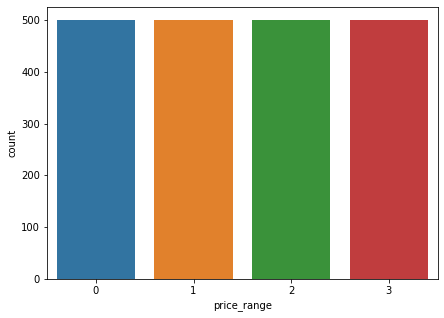

In [226]:
# Plotting a countplot

plt.figure(figsize=(7,5))
sns.countplot(x = df['price_range'])
plt.title('')
plt.show()

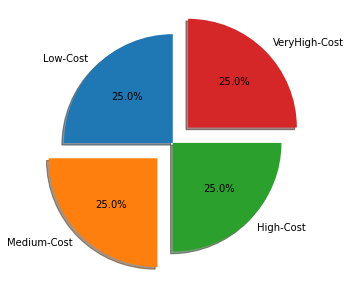

In [227]:
# Plotting a pie chart

price_labels = ['Low-Cost', 'Medium-Cost', 'High-Cost', 'VeryHigh-Cost']
data = df['price_range'].value_counts()

# Creating the plot
fig = plt.figure(figsize=(7,5))
plt.pie(data, labels = price_labels, autopct='%1.1f%%',explode = (0.0,0.2,0.0,0.2), shadow=True, startangle=90)
plt.show()

### Since we do not have any label-indexing/preprocessing to do here, we will explore the correlations between the various features provided.

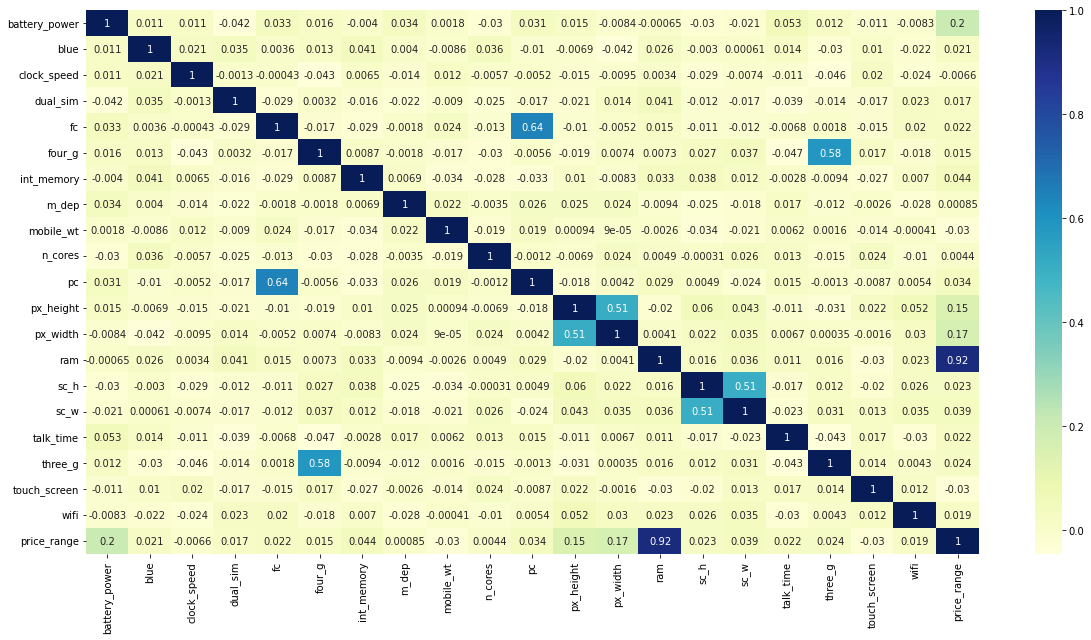

In [228]:
# Plotting a heatmap

fig = plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap = "YlGnBu")
plt.show()

## The above plot showed the correlation among the below features:


###fc(Front Camera mega pixels) - pc(Primary Camera mega pixels)
Ofcourse, if a phone has a great rear camera, it has to match great standards for the front camera as well. 

###four_g(4G) - three_g(3G)
If a mobile phone supports 4G, it has to be compatible with 3G as well because 4G is the latest gen that came after 3G. Thus a phone with 4G feature should support 3G as well.

###ram(Random Access Memory) - price_range 
Since our dataset has no feature showcasing the processor, that makes RAM the most important and most expensive feature among all, hence it is highly related to the price.

###sc_h(Screen Height of mobile in cm) - sc_w(Screen Width of mobile in cm)
It is obvious if we need a large screen phone, it's dimensions cannot only be increased by height or width, both are altered together. 

In [229]:
# Total number of columns in our dataset.

len(df.columns)

21

# Feature Selection
###We do not need extra features, as they don't contribute much in the results but do make our algorithms computationally expensive. Hence we will be selecting only the important features.

In [230]:
# Importing the feature selection library from sklearn
# It takes two arrays x and y, and returns a pair of arrays (scores, pvalues)

from sklearn.feature_selection import SelectKBest,chi2
# Select features according to 'K' highest scores.

In [231]:
# Before going any further let's first create a copy of our main dataset

df_copy = df.copy()
# Making two arrays 'x' & 'y' and assigning them independent and dependent variables

x = df_copy.iloc[:, :20]
y = df_copy.iloc[:, 20:]

In [232]:
# Checking the dimensions

print(x.shape)
print(y.shape)

(2000, 20)
(2000, 1)


In [233]:
# Using SelectKBest - that will help in calculating the scores for the features

skb = SelectKBest(chi2)
best_scores = skb.fit(x,y)

In [234]:
best_scores.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [235]:
# Making a seperate data frame to analyze the best features with respect to columns  

skb_score = pd.DataFrame(best_scores.scores_)
skb_columns = pd.DataFrame(x.columns)

# Getting the above two columns togethor through concat function

list_of_scores = pd.concat([ skb_columns, skb_score], axis = 1)
list_of_scores.columns = ['Features', 'Scores']

list_of_scores

,Features,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [236]:
# Now that we have calculated the scores of each feature, we can find the important features to be included

list_of_scores.nlargest(19, 'Scores')

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [237]:
# We will include only the top 10 features, as the scores below those are almost negligible 


list_of_scores.nlargest(10, 'Scores')

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


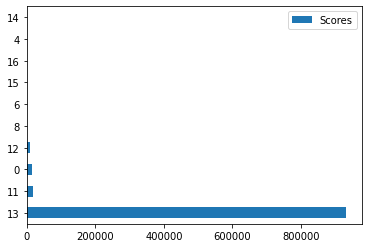

In [238]:
list_of_scores.nlargest(10, 'Scores').plot(kind = 'barh')

## We do not have much clear understanding of the important features from this univariate feature selection.

## Now we will use ExtraTreesClassifier from the sklearn library for Feature Importance Selection.
#### This class implements a meta estimator that fits a number of randomized decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [239]:
# Importing ExtraTreeClassifier library

from sklearn.ensemble import ExtraTreesClassifier

In [240]:
# Reshaping 'y' before fitting the data

y = y = df_copy['price_range']

In [241]:
y.shape

(2000,)

In [242]:
# Fitting the data


ft_imp = ExtraTreesClassifier()
ft_imp.fit(x, y)

ExtraTreesClassifier()

In [243]:
# Below are the Feature importances


ft_imp.feature_importances_

array([0.06319381, 0.01935831, 0.0326267 , 0.01881565, 0.03142249,
       0.01665183, 0.03377778, 0.03324281, 0.03636567, 0.03236062,
       0.03246926, 0.0461077 , 0.04849582, 0.40402072, 0.03296653,
       0.0327976 , 0.0338114 , 0.01373874, 0.01793921, 0.01983736])

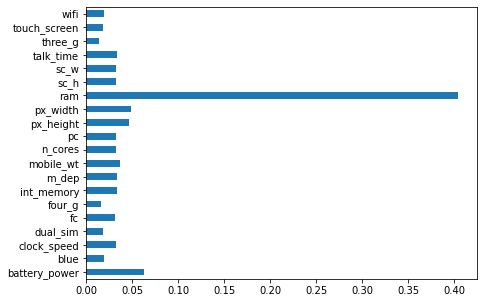

In [244]:
# Plotting the features Importances


plt.figure(figsize=(7,5))
feature_importance = pd.Series(ft_imp.feature_importances_, index=x.columns)
feature_importance.plot(kind='barh')
plt.show()

### RAM is the most influential

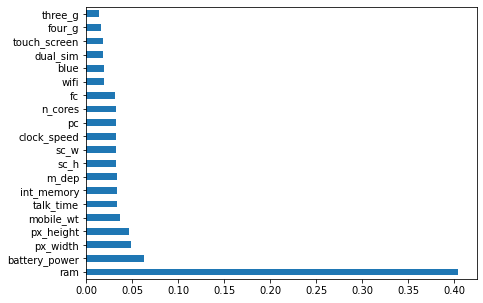

In [245]:
plt.figure(figsize=(7,5))
feature_importance = pd.Series(ft_imp.feature_importances_, index=x.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

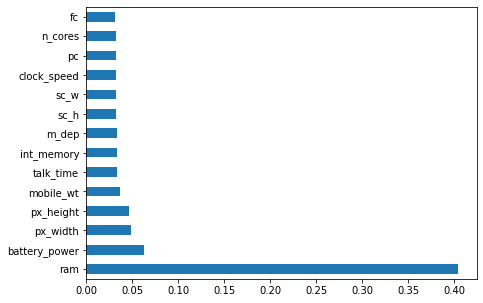

In [246]:

# Plotting the top 14 Important features


plt.figure(figsize=(7,5))
feature_importance = pd.Series(ft_imp.feature_importances_, index=x.columns)
feature_importance.nlargest(14).plot(kind='barh')
plt.show()

## After Multiple checks we found that the top 14 will be the only features useful to us, we don't need the rest 6 columns and hence will be dropping them from our dataset before applying any model

In [247]:
df_copy.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [248]:
# These are the following 6 columns that we do not need


df_copy = df_copy.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], axis = 1)

In [249]:
# Last check before entring the modelling phase

df_copy

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [250]:
df_copy.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [251]:
df_copy.shape

(2000, 15)

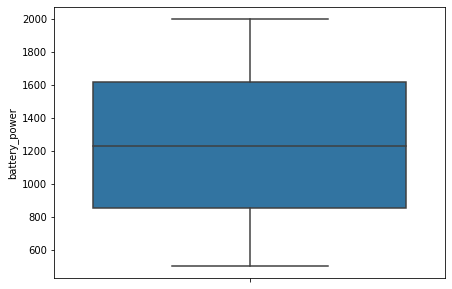

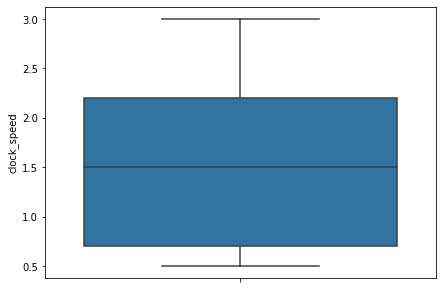

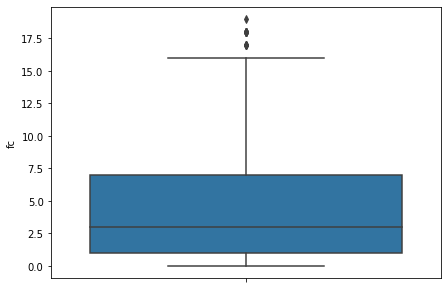

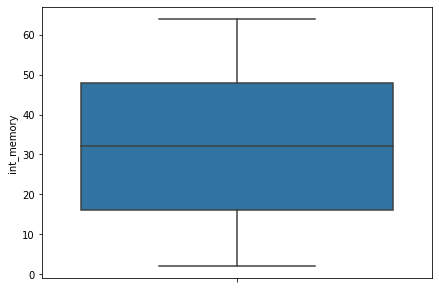

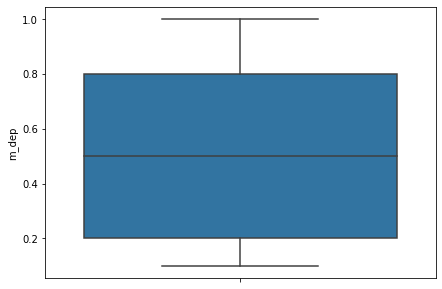

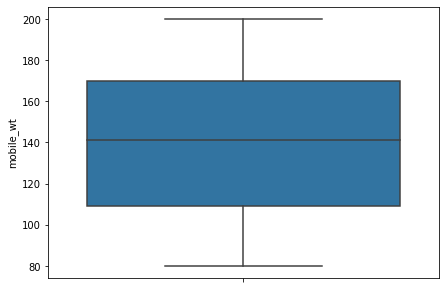

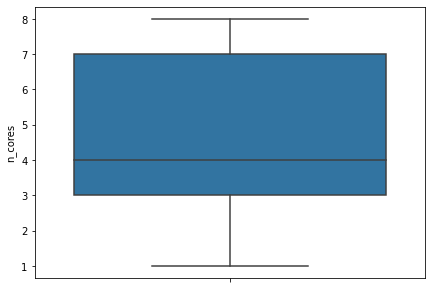

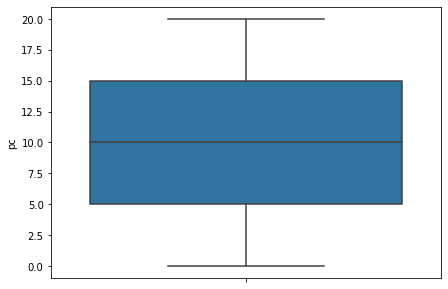

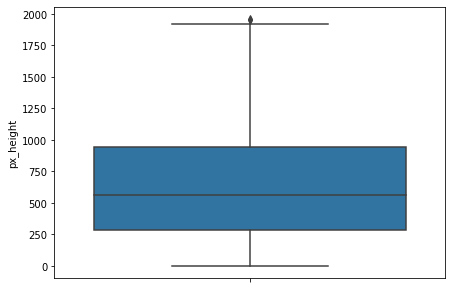

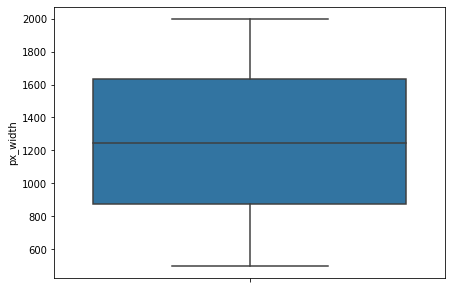

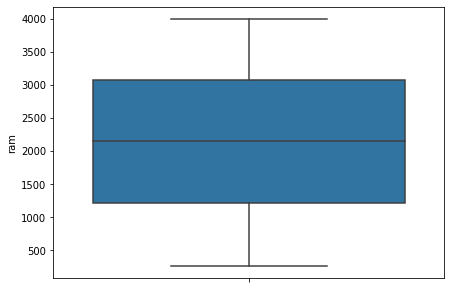

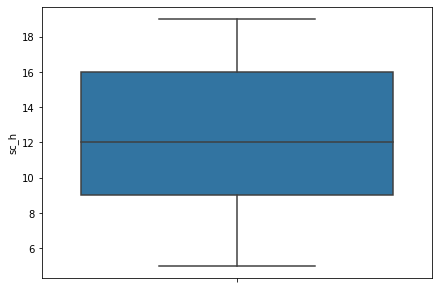

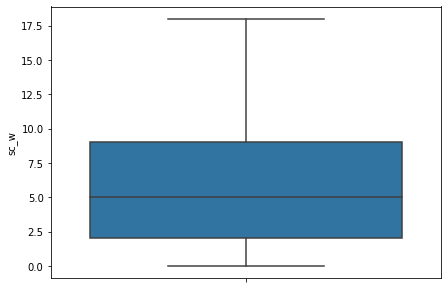

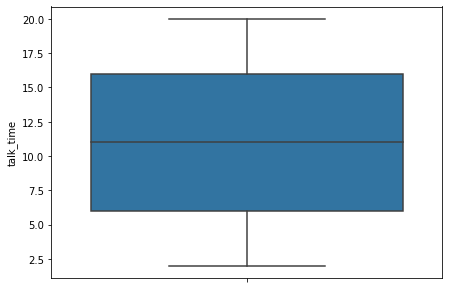

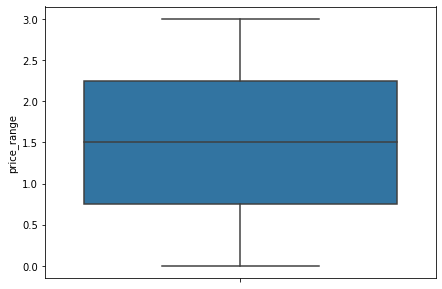

In [252]:
for col in df_copy:
  plt.figure(figsize= (7,5))
  sns.boxplot(y = df_copy[col])
plt.show()

### No outliers, we don't need any more cleaning of the data

## Everything seem fine. Let's Standardise the training data, because we already have removed the categorical features as their impact on the price of the mobile was lowest and did not affected much.

In [253]:
y = df_copy['price_range'].copy()
df_copy = df_copy.drop('price_range',axis=1)

In [254]:
stan_col = list(df_copy.columns)

In [255]:
# StandardScaler removes the mean and scales each feature/variable to unit variance.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_copy[stan_col] = scaler.fit_transform(df_copy[stan_col])

In [256]:
df_copy.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240


### Now our data has been Standardised. Moving on to Modelling part

## Splitting the data into Train test and Importing relevant libraries

In [257]:
from sklearn.model_selection import train_test_split 

X = df_copy[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']].copy()

In [258]:
print(X.shape)
print(y.shape)

(2000, 14)
(2000,)


In [259]:
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1600, 14)
(400, 14)


In [260]:
y_train.value_counts()

1    408
0    405
2    401
3    386
Name: price_range, dtype: int64

In [261]:
y_test.value_counts()

3    114
2     99
0     95
1     92
Name: price_range, dtype: int64

# **Logistic** **Regression**

### Importing required Libraries and Fitting logistic regression on our train data

In [262]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [263]:
# Get the predicted classes


train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [264]:
train_class_preds[:10]

array([0, 1, 3, 0, 3, 3, 0, 2, 1, 3])

### Evaluating metics for Logistic Regression

In [265]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report

# Get the accuracy scores

train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('--'*20)
print('--'*20)

cm_train = confusion_matrix(train_class_preds, y_train)
cm_test = confusion_matrix(test_class_preds, y_test)

print("The confusion matrix on the train data is :")
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print(cm_test)
print('--'*20)
print('--'*20)

train_report = classification_report(train_class_preds, y_train)
test_report = classification_report(test_class_preds, y_test)
print("The classification report on the train data is :")
print(train_report)
print('')
print("The classification report on the test data is :")
print(test_report)
print('--'*20)
print('--'*20)

train_roc_auc_score = roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.978125
The accuracy on test data is : 0.955
----------------------------------------
----------------------------------------
The confusion matrix on the train data is :
[[403   7   0   0]
 [  2 395  10   0]
 [  0   6 384   3]
 [  0   0   7 383]]

The confusion matrix on the train data is :
[[ 93   2   0   0]
 [  2  88   5   0]
 [  0   2  90   3]
 [  0   0   4 111]]
----------------------------------------
----------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       410
           1       0.97      0.97      0.97       407
           2       0.96      0.98      0.97       393
           3       0.99      0.98      0.99       390

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


The classification report on t

## Now there are two possibilities from here : 

### 1) Either the dataset is really good

### 2) or the model is overfitting

### To clear the above doubts let's continue applying different models

In [266]:

def train_confusion_matrix(x):
  '''
  FUNCTION FOR PLOTTING TRAIN CONFUSION MATRIX 
  '''
  plt.figure(figsize=(10,7))
  labels = ['0', '1', '2', '3']
  ax= plt.subplot()
  sns.heatmap(x, annot=True, ax = ax) 

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()
  

In [267]:
def test_confusion_matrix(x):
  '''
  FUNCTION FOR PLOTTING TEST CONFUSION MATRIX 
  '''
  plt.figure(figsize=(10,7))
  labels = ['0', '1', '2', '3']
  ax= plt.subplot()
  sns.heatmap(x, annot=True, ax = ax) 

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()
  

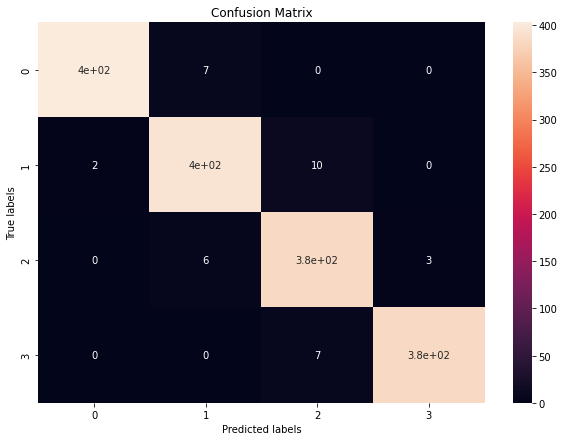

In [268]:
train_confusion_matrix(cm_train)

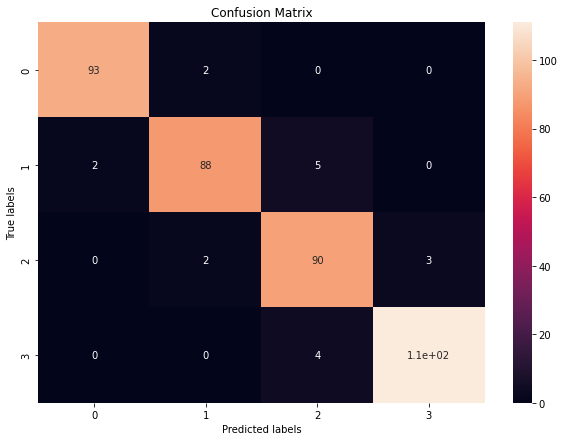

In [269]:
test_confusion_matrix(cm_test)

#**Decision Tree**

###Importing required libraries and fitting the data

In [270]:
from sklearn.tree import DecisionTreeClassifier

In [271]:
Decision_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
Decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [272]:
# Get the predicted classes


train_class_preds_DT = clf.predict(X_train)
test_class_preds_DT = clf.predict(X_test)

In [273]:
test_class_preds_DT[:10]

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1])

##**Visualizing Decision Tree**

In [274]:
# Importing required libraries

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

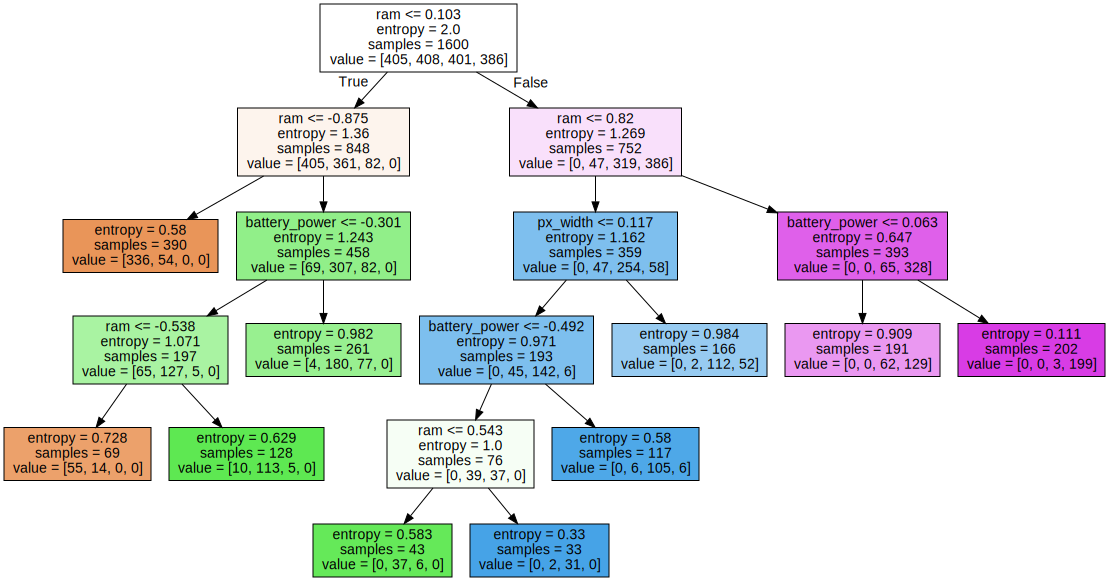

In [275]:
graph = Source(tree.export_graphviz(Decision_classifier, out_file=None
   , feature_names=X_train.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

### Evaluation metrics for Decision Tree

In [276]:
accuracy_score(y_test, test_class_preds_DT) * 100

95.5

In [277]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report

# Get the accuracy scores

train_accuracy = accuracy_score(train_class_preds_DT,y_train)
test_accuracy = accuracy_score(test_class_preds_DT,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('--'*20)
print('--'*20)

cm_train = confusion_matrix(train_class_preds_DT, y_train)
cm_test = confusion_matrix(test_class_preds_DT, y_test)

print("The confusion matrix on the train data is :")
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print(cm_test)
print('--'*20)
print('--'*20)

train_report = classification_report(train_class_preds_DT, y_train)
test_report = classification_report(test_class_preds_DT, y_test)
print("The classification report on the train data is :")
print(train_report)
print('')
print("The classification report on the test data is :")
print(test_report)
print('--'*20)
print('--'*20)

train_roc_auc_score = roc_auc_score(y_train, Decision_classifier.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test, Decision_classifier.predict_proba(X_test), multi_class='ovr')
print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.978125
The accuracy on test data is : 0.955
----------------------------------------
----------------------------------------
The confusion matrix on the train data is :
[[403   7   0   0]
 [  2 395  10   0]
 [  0   6 384   3]
 [  0   0   7 383]]

The confusion matrix on the train data is :
[[ 93   2   0   0]
 [  2  88   5   0]
 [  0   2  90   3]
 [  0   0   4 111]]
----------------------------------------
----------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       410
           1       0.97      0.97      0.97       407
           2       0.96      0.98      0.97       393
           3       0.99      0.98      0.99       390

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


The classification report on t

## Since we are seeing the same results from Decision Tree as that of the Logistic Regression. We don't see the need for confusion matrix visulaization

# **Cross validation and Hyperparameter tunning**


In [278]:
#defining parameter for model
parameters={"max_depth" : [1,2,3,5,7,9,11,12,15,20,25,50,100],
           "min_samples_leaf":[1,2,3,4,5,10,15,20,40,60,80,100],
           "max_leaf_nodes":[None,10,20,30,40,50,70,100,140,150]}

In [279]:
#building decision tree regression model with cross validation and hyper parameter tunning
from sklearn.model_selection import GridSearchCV

class_decision_model = DecisionTreeClassifier()
tuning_Decision_classifier = GridSearchCV(class_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)
tuning_Decision_classifier.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 5, 7, 9, 11, 12, 15, 20, 25, 50,
                                       100],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 70, 100,
                                            140, 150],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20, 40, 60,
                                              80, 100]},
             scoring='neg_mean_squared_error')

In [280]:
#gettting best hyperparameter

tuning_Decision_classifier.best_params_

{'max_depth': 12, 'max_leaf_nodes': 50, 'min_samples_leaf': 5}

In [281]:
#prediction on train and test data

tune_y_train_pred = tuning_Decision_classifier.predict(X_train)
tune_y_test_pred = tuning_Decision_classifier.predict(X_test)

### Evalation metrics for Decision Tree using GridSearchCV

In [282]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report

# Get the accuracy scores

train_accuracy = accuracy_score(tune_y_train_pred,y_train)
test_accuracy = accuracy_score(tune_y_test_pred,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('--'*20)
print('--'*20)

cm_train = confusion_matrix(tune_y_train_pred, y_train)
cm_test = confusion_matrix(tune_y_test_pred, y_test)

print("The confusion matrix on the train data is :")
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print(cm_test)
print('--'*20)
print('--'*20)

train_report = classification_report(tune_y_train_pred, y_train)
test_report = classification_report(tune_y_test_pred, y_test)
print("The classification report on the train data is :")
print(train_report)
print('')
print("The classification report on the test data is :")
print(test_report)
print('--'*20)
print('--'*20)

train_roc_auc_score = roc_auc_score(y_train, tuning_Decision_classifier.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test, tuning_Decision_classifier.predict_proba(X_test), multi_class='ovr')
print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.93125
The accuracy on test data is : 0.8525
----------------------------------------
----------------------------------------
The confusion matrix on the train data is :
[[386  18   0   0]
 [ 19 372  18   0]
 [  0  18 361  15]
 [  0   0  22 371]]

The confusion matrix on the train data is :
[[ 86   6   0   0]
 [  9  71   8   0]
 [  0  15  81  11]
 [  0   0  10 103]]
----------------------------------------
----------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       404
           1       0.91      0.91      0.91       409
           2       0.90      0.92      0.91       394
           3       0.96      0.94      0.95       393

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600


The classification report on t

## Plotting the confusion matrix

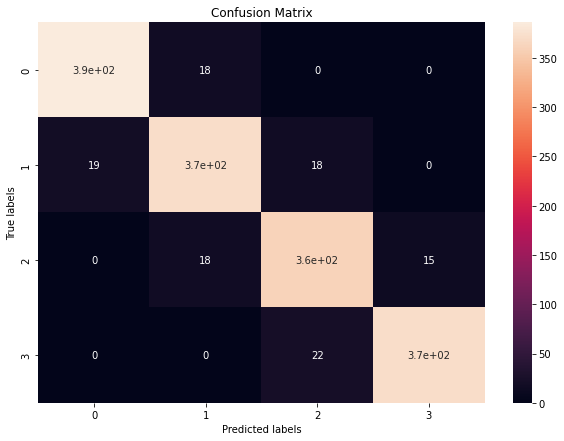

In [283]:
# Trian Matrix

train_confusion_matrix(cm_train)

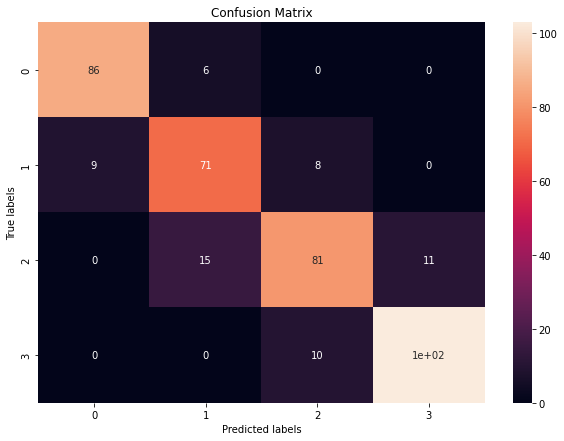

In [284]:
# Test Matrix

test_confusion_matrix(cm_test)

#**Random Forest**

### Importing required libraries and implementing

In [285]:
#fitting data to model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [286]:
#prediction on train and test data

random_y_train_pred=rfc.predict(X_train)
random_y_test_pred=rfc.predict(X_test)

### **Evaluation metrics**

In [287]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report

# Get the accuracy scores

train_accuracy = accuracy_score(random_y_train_pred,y_train)
test_accuracy = accuracy_score(random_y_test_pred,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('--'*20)
print('--'*20)

cm_train = confusion_matrix(random_y_train_pred, y_train)
cm_test = confusion_matrix(random_y_test_pred, y_test)

print("The confusion matrix on the train data is :")
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print(cm_test)
print('--'*20)
print('--'*20)

train_report = classification_report(random_y_train_pred, y_train)
test_report = classification_report(random_y_test_pred, y_test)
print("The classification report on the train data is :")
print(train_report)
print('')
print("The classification report on the test data is :")
print(test_report)
print('--'*20)
print('--'*20)

train_roc_auc_score = roc_auc_score(y_train, rfc.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovr')
print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 1.0
The accuracy on test data is : 0.8875
----------------------------------------
----------------------------------------
The confusion matrix on the train data is :
[[405   0   0   0]
 [  0 408   0   0]
 [  0   0 401   0]
 [  0   0   0 386]]

The confusion matrix on the train data is :
[[ 94   5   0   0]
 [  1  77  13   0]
 [  0  10  79   9]
 [  0   0   7 105]]
----------------------------------------
----------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


The classification report on the t

## Moving on to the next model as we can we see our training data is getting overfitted 

# **XGBoost Model**

In [288]:
# Importing required libraries

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [289]:
# Number of trees
n_estimators = [200,250]

# Maximum depth of trees
max_depth = [6,8,10]

# Child weight
min_child_weight= [8,10,12]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,'min_child_weight': min_child_weight }

param_dict

{'max_depth': [6, 8, 10],
 'min_child_weight': [8, 10, 12],
 'n_estimators': [200, 250]}

In [290]:
XGB = xgb.XGBClassifier()

# Grid search
XGB_grid = GridSearchCV(estimator = XGB,
                       param_grid = param_dict,
                       cv = 3, verbose=2, n_jobs=-1, scoring = 'r2' )
XGB_grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10],
                         'min_child_weight': [8, 10, 12],
                         'n_estimators': [200, 250]},
             scoring='r2', verbose=2)

In [291]:
XGB_grid.best_score_

0.9187570246387958

In [292]:
XGB_grid.best_params_

{'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 250}

In [293]:
XGB_optimal_model = XGB_grid.best_estimator_
XGB_optimal_model

XGBClassifier(max_depth=6, min_child_weight=10, n_estimators=250,
              objective='multi:softprob')

In [294]:
XGB_y_pred_train = XGB_optimal_model.predict(X_train)   # Prediction for train dataset
XGB_y_pred_test = XGB_optimal_model.predict(X_test)     # Predictionfor test dataset

### **Evaluating metrices**

In [295]:
# Get the accuracy scores

train_accuracy = accuracy_score(XGB_y_pred_train,y_train)
test_accuracy = accuracy_score(XGB_y_pred_test,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('--'*20)
print('--'*20)

cm_train = confusion_matrix(XGB_y_pred_train, y_train)
cm_test = confusion_matrix(XGB_y_pred_test, y_test)

print("The confusion matrix on the train data is :")
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print(cm_test)
print('--'*20)
print('--'*20)

train_report = classification_report(XGB_y_pred_train, y_train)
test_report = classification_report(XGB_y_pred_test, y_test)
print("The classification report on the train data is :")
print(train_report)
print('')
print("The classification report on the test data is :")
print(test_report)
print('--'*20)
print('--'*20)

train_roc_auc_score = roc_auc_score(y_train,  XGB_optimal_model.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test,  XGB_optimal_model.predict_proba(X_test), multi_class='ovr')
print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 1.0
The accuracy on test data is : 0.9175
----------------------------------------
----------------------------------------
The confusion matrix on the train data is :
[[405   0   0   0]
 [  0 408   0   0]
 [  0   0 401   0]
 [  0   0   0 386]]

The confusion matrix on the train data is :
[[ 94   5   0   0]
 [  1  79   6   0]
 [  0   8  87   7]
 [  0   0   6 107]]
----------------------------------------
----------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


The classification report on the t

## The data is being over-fitted in case og XGB-Classifier

## **K Nearest Neighbour Model**

In [296]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=20)
kn.fit(X_train,y_train)

# Predict the test set
y_train_pred = kn.predict(X_train)

y_test_pred = kn.predict(X_test)

### **Evaluating metrices**

In [297]:
# Get the accuracy scores

train_accuracy = accuracy_score(y_train_pred,y_train)
test_accuracy = accuracy_score(y_test_pred,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('--'*20)
print('--'*20)

cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_test_pred, y_test)

print("The confusion matrix on the train data is :")
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print(cm_test)
print('--'*20)
print('--'*20)

train_report = classification_report(y_train_pred, y_train)
test_report = classification_report(y_test_pred, y_test)
print("The classification report on the train data is :")
print(train_report)
print('')
print("The classification report on the test data is :")
print(test_report)
print('--'*20)
print('--'*20)

train_roc_auc_score = roc_auc_score(y_train,  kn.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test,  kn.predict_proba(X_test), multi_class='ovr')
print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.731875
The accuracy on test data is : 0.635
----------------------------------------
----------------------------------------
The confusion matrix on the train data is :
[[346  73   4   0]
 [ 58 266  84   6]
 [  1  65 271  92]
 [  0   4  42 288]]

The confusion matrix on the train data is :
[[76 25  0  0]
 [18 46 32  3]
 [ 1 20 59 38]
 [ 0  1  8 73]]
----------------------------------------
----------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       423
           1       0.65      0.64      0.65       414
           2       0.68      0.63      0.65       429
           3       0.75      0.86      0.80       334

    accuracy                           0.73      1600
   macro avg       0.73      0.74      0.73      1600
weighted avg       0.73      0.73      0.73      1600


The classification report on the test data is 

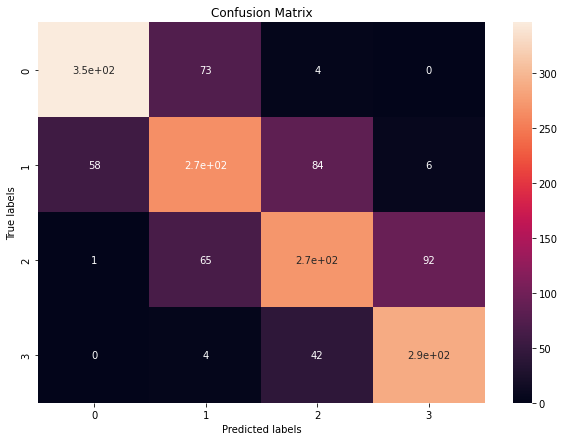

In [298]:
# Trian Matrix

train_confusion_matrix(cm_train)

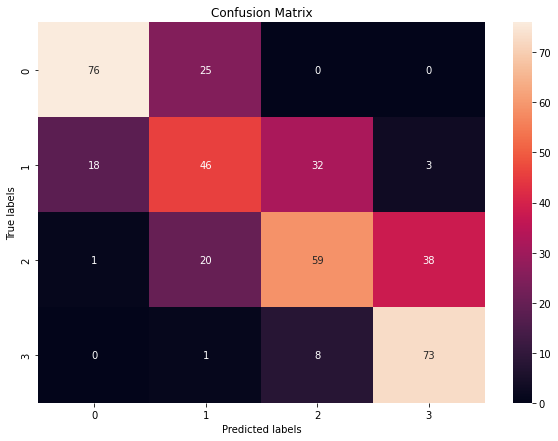

In [299]:
# Test matrix

test_confusion_matrix(cm_test)

#**Support Vector Classifier (SVC) Implementation**

In [300]:
# Importing Required files and implementing 

from sklearn import svm
svm_clf = svm.SVC(probability=True)

In [301]:
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [302]:
svm_y_pred_train = svm_clf.predict(X_train)   # Prediction for train dataset
svm_y_pred_test = svm_clf.predict(X_test)     # Predictionfor test dataset

### **Evaluating metrices**

In [303]:
train_accuracy = accuracy_score(svm_y_pred_train,y_train)
test_accuracy = accuracy_score(svm_y_pred_test,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('--'*20)
print('--'*20)

cm_train = confusion_matrix(svm_y_pred_train, y_train)
cm_test = confusion_matrix(svm_y_pred_test, y_test)

print("The confusion matrix on the train data is :")
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print(cm_test)
print('--'*20)
print('--'*20)

train_report = classification_report(svm_y_pred_train, y_train)
test_report = classification_report(svm_y_pred_test, y_test)
print("The classification report on the train data is :")
print(train_report)
print('')
print("The classification report on the test data is :")
print(test_report)
print('--'*20)
print('--'*20)

train_roc_auc_score = roc_auc_score(y_train,  svm_clf.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test,  svm_clf.predict_proba(X_test), multi_class='ovr')
print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.981875
The accuracy on test data is : 0.9175
----------------------------------------
----------------------------------------
The confusion matrix on the train data is :
[[400   3   0   0]
 [  5 397   7   0]
 [  0   8 393   5]
 [  0   0   1 381]]

The confusion matrix on the train data is :
[[ 92   4   0   0]
 [  3  82   7   0]
 [  0   6  89  10]
 [  0   0   3 104]]
----------------------------------------
----------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       403
           1       0.97      0.97      0.97       409
           2       0.98      0.97      0.97       406
           3       0.99      1.00      0.99       382

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


The classification report on 

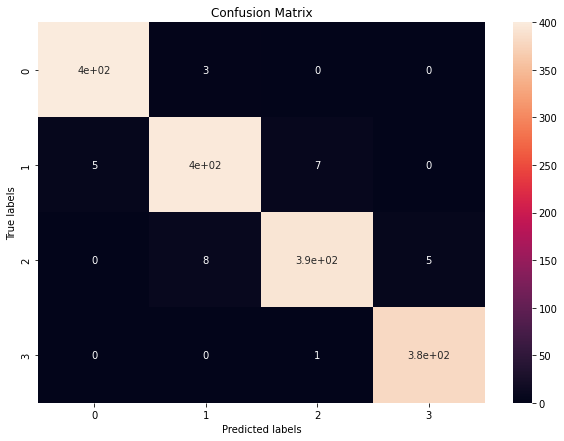

In [304]:
# Plotting the train confusion matrix

train_confusion_matrix(cm_train)

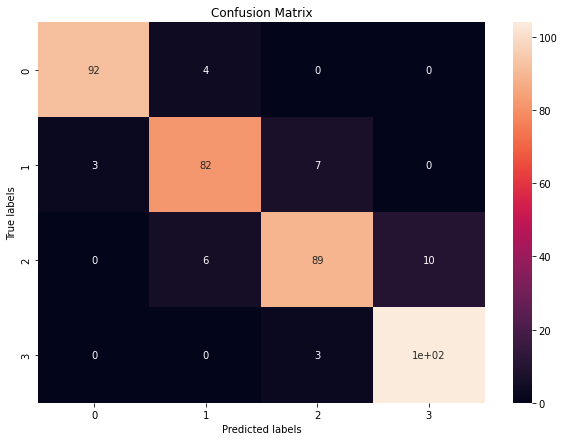

In [305]:
# Plotting the test confusion matrix

test_confusion_matrix(cm_test)


## SVM always lives up to expectations. Excellent results obtained using SVM 

# **Applying NEURAL NETWORKS**

In [306]:
#Importing MinMaxScaler to scale the inputs

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scaling features matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
X1 = std_sc.fit_transform(X=X)

# Splitting the data into train and test
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

X_train, X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2)

In [307]:
# Importing MLPClassifier  -------- This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

from sklearn.neural_network import MLPClassifier

In [308]:
nn = MLPClassifier(solver='lbfgs', alpha= 1e-5, hidden_layer_sizes=(5,2), random_state=0, max_iter = 1000)

In [309]:
nn.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=0, solver='lbfgs')

In [310]:
nn.score(X_test, y_test)

0.7225

In [311]:
parameter = {
    'hidden_layer_sizes':[(5,2),(10,),(20,)],
    'activation' : ['tanh', 'relu'],
    'solver':['lbfgs','sgd','adam'],
    'alpha':[0.0001,0.05, 1e-5],
    'max_iter':[10,100,1000,10000]
}

In [312]:
from sklearn.model_selection import GridSearchCV
nn_clf = GridSearchCV(nn,parameter, n_jobs=-1, cv=2)
nn_clf.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2),
                                     max_iter=1000, random_state=0,
                                     solver='lbfgs'),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 1e-05],
                         'hidden_layer_sizes': [(5, 2), (10,), (20,)],
                         'max_iter': [10, 100, 1000, 10000],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [313]:
nn_clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10,),
 'max_iter': 10000,
 'solver': 'adam'}

In [314]:
nn_clf.score(X_test,y_test)

0.9675

In [315]:
nn_y_pred_train = nn_clf.predict(X_train)   # Prediction for train dataset
nn_y_pred_test = nn_clf.predict(X_test)     # Predictionfor test dataset

## **Evaluation Metrics**

In [316]:
train_accuracy = accuracy_score(nn_y_pred_train,y_train)
test_accuracy = accuracy_score(nn_y_pred_test,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('--'*20)
print('--'*20)

cm_train = confusion_matrix(nn_y_pred_train, y_train)
cm_test = confusion_matrix(nn_y_pred_test, y_test)

print("The confusion matrix on the train data is :")
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print(cm_test)
print('--'*20)
print('--'*20)

train_report = classification_report(nn_y_pred_train, y_train)
test_report = classification_report(nn_y_pred_test, y_test)
print("The classification report on the train data is :")
print(train_report)
print('')
print("The classification report on the test data is :")
print(test_report)
print('--'*20)
print('--'*20)

train_roc_auc_score = roc_auc_score(y_train,  nn_clf.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test,  nn_clf.predict_proba(X_test), multi_class='ovr')
print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.991875
The accuracy on test data is : 0.9675
----------------------------------------
----------------------------------------
The confusion matrix on the train data is :
[[407   1   0   0]
 [  0 389   2   0]
 [  0   3 387   3]
 [  0   0   4 404]]

The confusion matrix on the train data is :
[[ 92   2   0   0]
 [  1 100   3   0]
 [  0   5 103   1]
 [  0   0   1  92]]
----------------------------------------
----------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       0.99      0.99      0.99       391
           2       0.98      0.98      0.98       393
           3       0.99      0.99      0.99       408

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600


The classification report on 

## **Our Neural-Network outperformed all the other algorithms.**

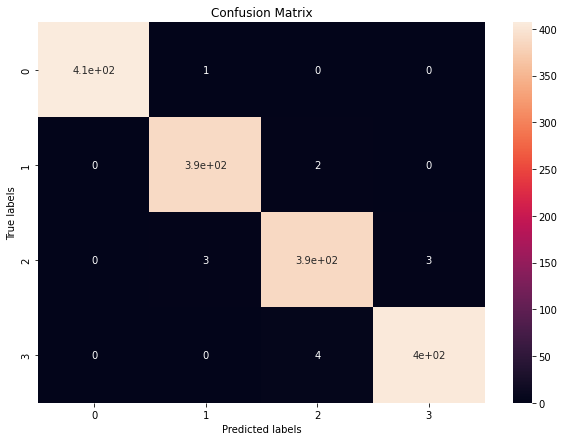

In [317]:
# Plotting the train confusion matrix

train_confusion_matrix(cm_train)

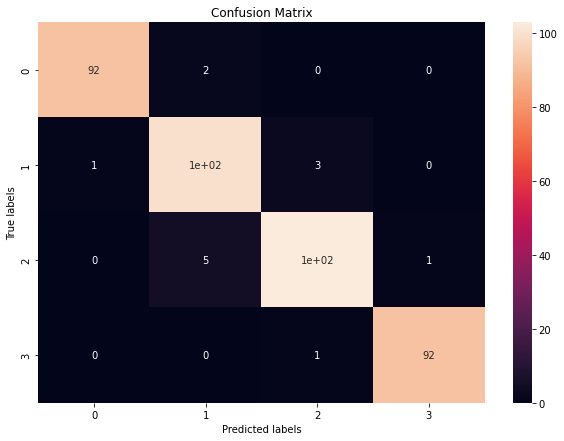

In [318]:
# Plotting the test confusion matrix

test_confusion_matrix(cm_test)

# **COMPARISON**

In [319]:
Comparision_dict={'Model_Name':['Logistic Regression','Decision Tree','KNN', 'Support Vector Machine', 'Neural-Network'],
                  'Training_accuracy':[0.978,0.941,0.731,0.980,0.983],
                  'Test_accuracy':[0.955,0.855,0.635,0.917,0.975],
                  'Train_roc_auc_score':[0.999,0.996,0.907,0.999,0.999],
                  'Test_roc_auc_score':[0.998,0.944,0.868,0.990,0.998]} 

## Removing 'Random Forest' & 'XGBoost' from our model comparsion as they were overfitting the data, also we had other model working so perfectly that we don't need them in the comparsion.

In [320]:
Comparisione_df=pd.DataFrame(Comparision_dict)

In [321]:
Comparisione_df

,Model_Name,Training_accuracy,Test_accuracy,Train_roc_auc_score,Test_roc_auc_score
0,Logistic Regression,0.978,0.955,0.999,0.998
1,Decision Tree,0.941,0.855,0.996,0.944
2,KNN,0.731,0.635,0.907,0.868
3,Support Vector Machine,0.980,0.917,0.999,0.990
4,Neural-Network,0.983,0.975,0.999,0.998


In [322]:
def barplots(x,y):
    plt.figure(figsize=(10,5))
    sns.barplot(data=Comparisione_df, x='Model_Name', y=y, palette='ch:s=-.2,r=.6')

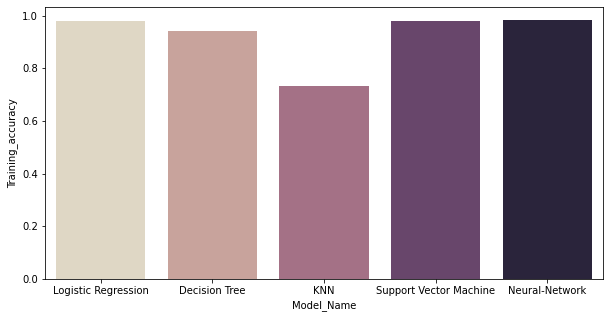

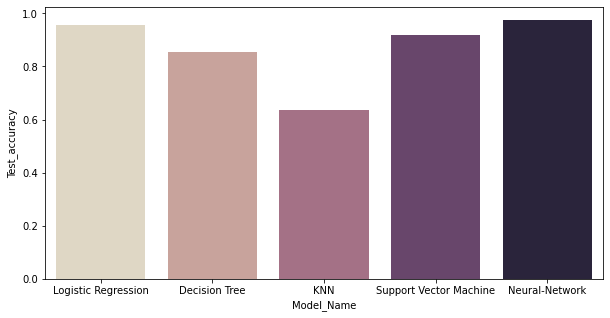

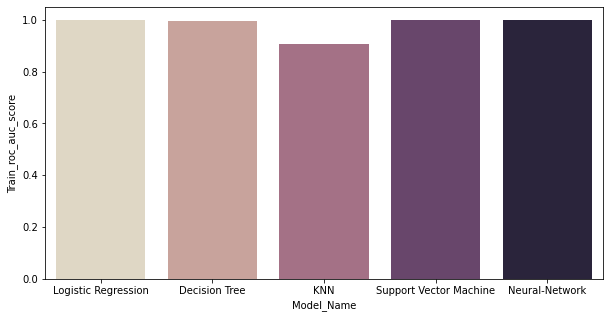

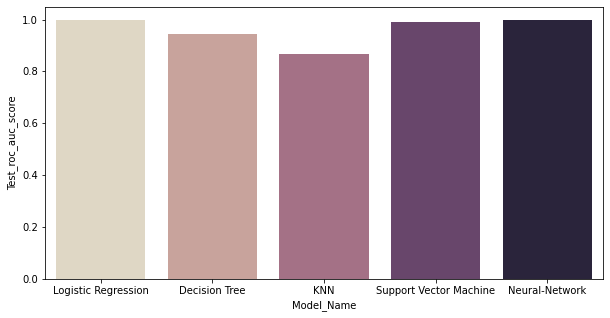

In [323]:
y=['Training_accuracy','Test_accuracy','Train_roc_auc_score','Test_roc_auc_score']
for i in y:
    barplots('Model_Name',i)
    plt.show()


# **Conclusion**

## Logistic regression and Support Vector Machine have a really tough competition but were surpassed by Neural Networks.

# Thus; for production we will go with our **Neural Network Model** 

* As observed Logistic Regression and decision tree model performs well along with support vector machine and neural network model.
* Out of all the model we have tried Neural Network is performing well on overall classes.
* **Ram, Battery power, Mobile weight, Screen size** and **Pixels** are key features in predicting the mobile price range.
